# Introduction & Project Goal

The goal of this project is to analyze the passenger data from the Titanic Ship to identify the key factors that influenced a person's chances of survival.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('E:/DATA SCIENCE/titanic.csv')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Data Cleaning

In [23]:
df['age'] = df['age'].fillna(df['age'].median())
df['deck'] = df['deck'].fillna(df['deck'].mode()[0])
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

Missing values in the 'Age' column were filled with the median age of all passengers, while missing 'Embarked' ports were filled with the most common port of embarkation.

In [24]:
df['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

# Survival Rate by Gender: A Stark Divide

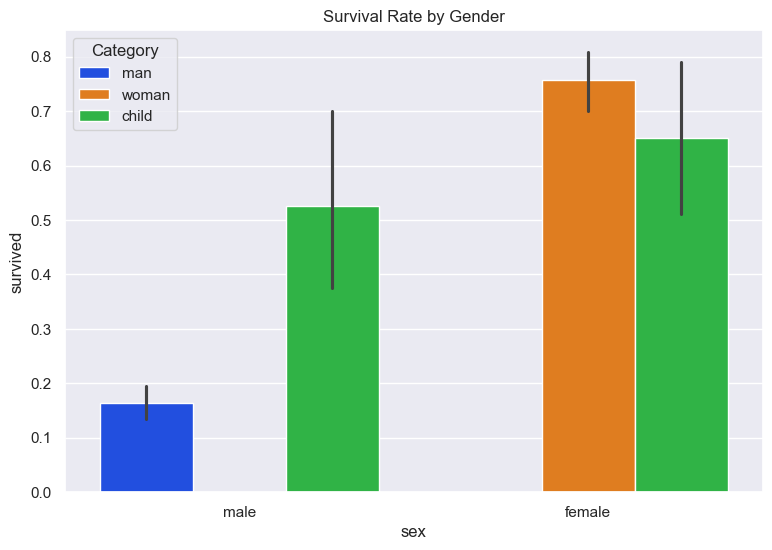

In [25]:
df_new = df.copy()
df_new = df_new.rename(columns = {'who' : 'Category'})
sns.set_style('whitegrid')
sns.set(font_scale = 1)
plt.figure(figsize = (9,6))
sns.barplot(x='sex', y='survived', data=df_new, hue='Category', palette = 'bright')
plt.title('Survival Rate by Gender')
plt.show()

Insight: This plot starkly illustrates the "women and children first" protocol. Female passengers had a survival rate of approximately 75%, whereas male passengers had a survival rate below 20%. This establishes gender as one of the most critical factors for survival.

# Class Matters: Survival Rates by Passenger Class and Gender

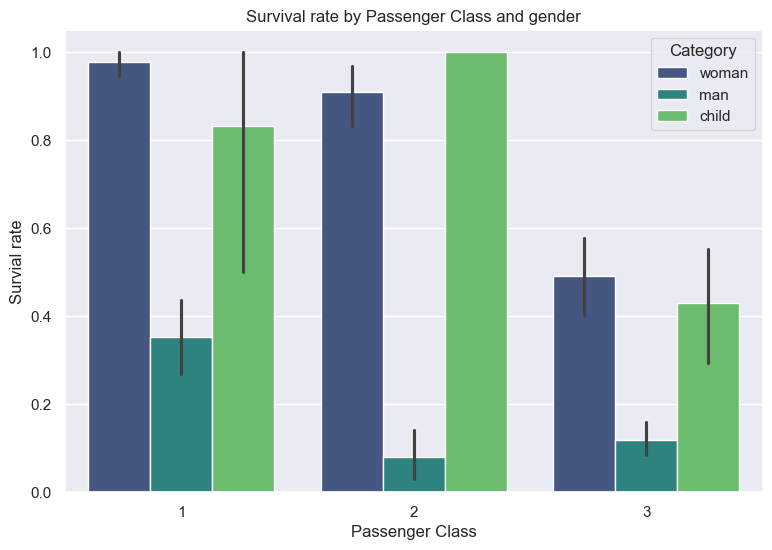

In [26]:
df_new = df.copy()
df_new = df_new.rename(columns = {'who' : 'Category'})
sns.set_style('darkgrid')
sns.set(font_scale=1)
plt.figure(figsize = (9,6))
sns.barplot(x = 'pclass', y = 'survived', data = df_new, hue = 'Category', palette = 'viridis')
plt.title('Survival rate by Passenger Class and gender')
plt.xlabel('Passenger Class')
plt.ylabel('Survial rate')
plt.show()

Insight: While females had a higher survival rate across all classes, socio-economic status was also a critical factor. First-class passengers had the highest survival rate within their gender. The survival advantage decreases significantly for second and third-class passengers, highlighting the powerful combined effect of both gender and wealth.



# The Price of Survival: Fare Distribution for Survivors vs. Non-Survivors

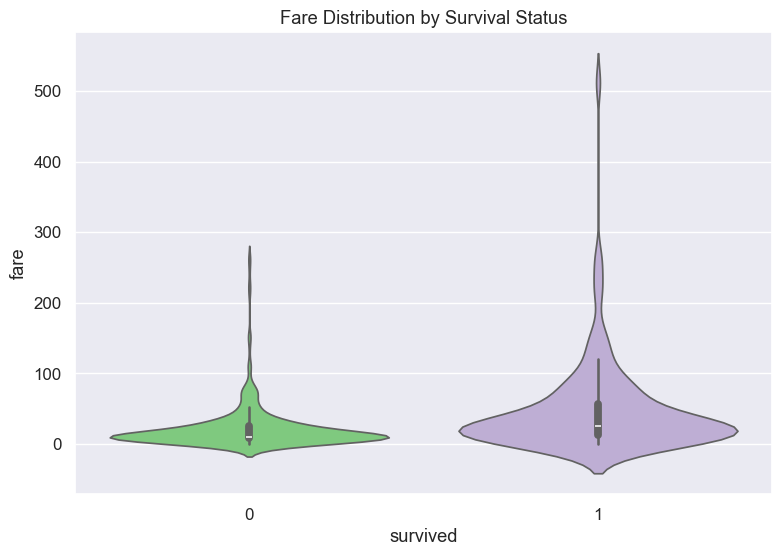

In [27]:
sns.set_style('whitegrid')
sns.set(font_scale = 1.1)
plt.figure(figsize=(9,6))
sns.violinplot(x = 'survived', y = 'fare', data = df, saturation = 1 , palette = 'Accent', hue='survived', legend = False )
plt.title('Fare Distribution by Survival Status')
plt.show()

Insight: This violin plot demonstrates a strong correlation between the fare paid and the likelihood of survival. The distribution for survivors is wider and skewed towards higher fares, indicating that wealthier passengers had a better chance of making it off the ship.

# Survival Rate by Family Size

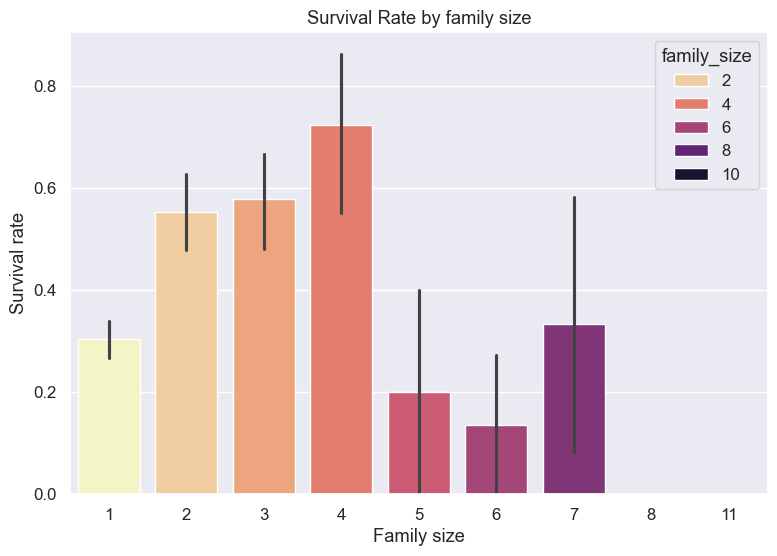

In [28]:
df['family_size'] = df['sibsp'] + df['parch'] + 1
sns.set(font_scale = 1.1)
plt.figure(figsize=(9,6))
sns.barplot(x = 'family_size', y = 'survived', data = df, hue = 'family_size', palette = 'magma_r')
plt.title('Survival Rate by family size')
plt.xlabel('Family size')
plt.ylabel('Survival rate')
plt.show()

Insight: Passengers traveling alone or in very large families (5 or more members) had lower survival rates. The highest chance of survival belonged to those in small family groups of 2 to 4.

# Youth's Advantage: Age Distribution by Survival Status

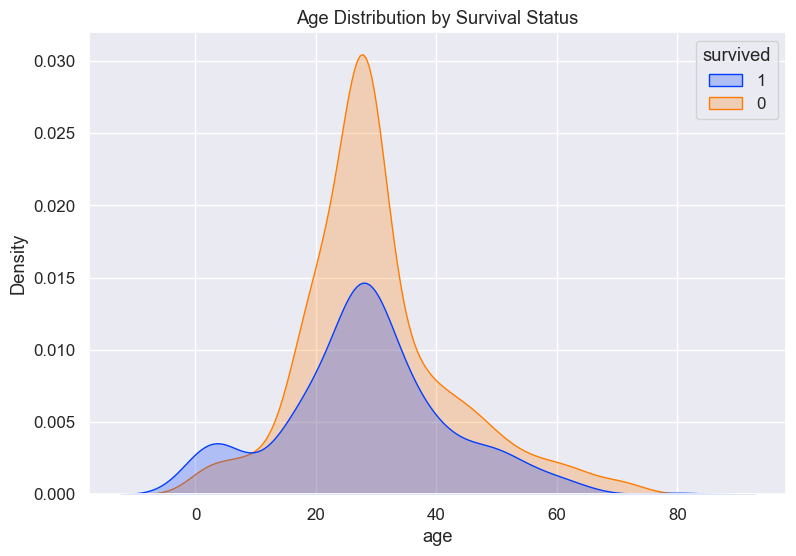

In [29]:
sns.set(font_scale = 1.1)
plt.figure(figsize=(9,6))
sns.kdeplot(x = 'age', hue = 'survived', data = df, hue_order = [1,0] , fill = True, palette = 'bright')
plt.title('Age Distribution by Survival Status')
plt.show()

Insight: The KDE plot highlights that age was a key factor in survival. There is a prominent spike in the survival distribution for young children (under age 10), reinforcing the "women and children first" observation. Conversely, the majority of non-survivors were young to middle-aged adults (20-40).

# Town of Embarkation and Its Link to Survival

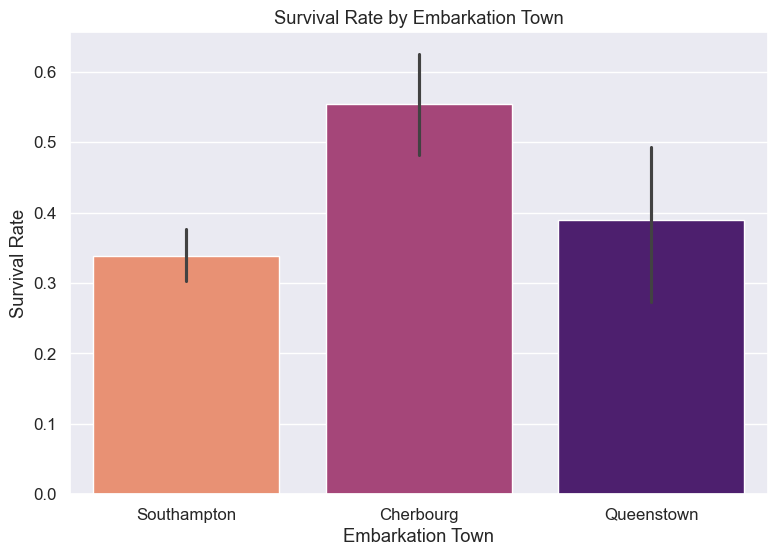

In [30]:
sns.set(font_scale = 1.1)
plt.figure(figsize=(9,6))
sns.barplot(x='embark_town', y='survived', data=df, hue = 'embark_town', palette = 'magma_r', legend = False)
plt.title('Survival Rate by Embarkation Town')
plt.xlabel('Embarkation Town')
plt.ylabel('Survival Rate')
plt.show()

Insight: This chart shows a notable difference in survival rates based on the town of embarkation. Passengers who boarded at Cherbourg had a significantly higher survival rate (over 50%) compared to those from Southampton and Queenstown.

# Uncovering the Cherbourg Anomaly: Survival by Port and Class

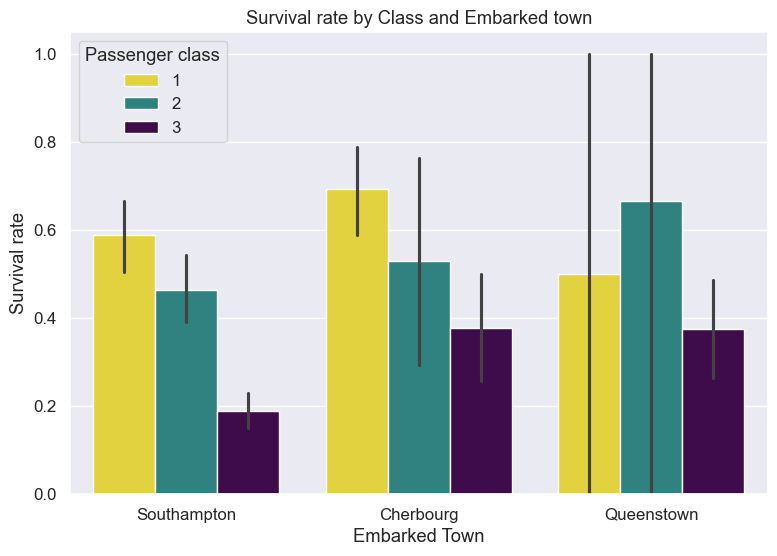

In [31]:
sns.set_style('ticks')
df_new = df.copy()
df_new = df_new.rename(columns = {'pclass' : 'Passenger class'})

sns.set(font_scale = 1.1)
plt.figure(figsize = (9,6))

sns.barplot(x = 'embark_town', y = 'survived', data = df_new, hue = 'Passenger class', palette = 'viridis_r')
plt.title('Survival rate by Class and Embarked town')
plt.xlabel('Embarked Town')
plt.ylabel('Survival rate')
plt.show()

Insight: This follow-up plot explains the observation from the previous chart. The higher survival rate for Cherbourg passengers is largely because a much higher proportion of first-class passengers embarked from that town. This shows that passenger class is a strong confounding variable for the port of embarkation.

# Mapping Survival: Age vs Fare

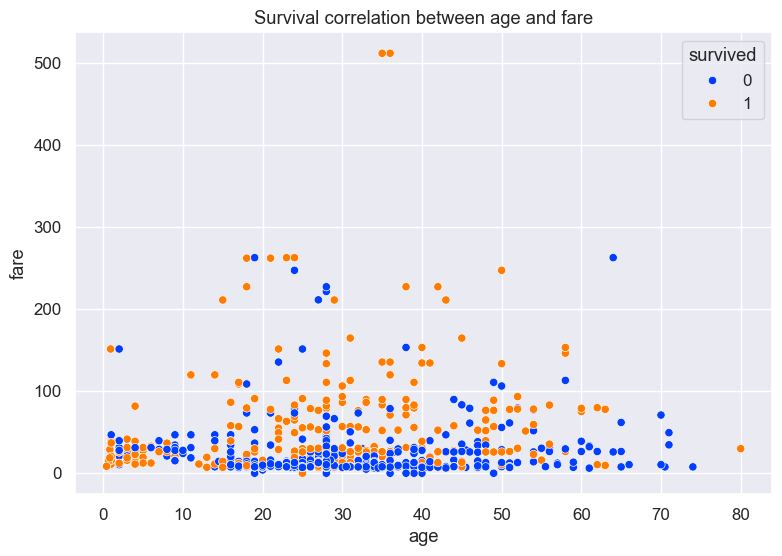

In [32]:
sns.set(font_scale = 1.1)
plt.figure(figsize = (9,6))
sns.scatterplot(x = 'age', y = 'fare', data = df, hue = 'survived', palette = 'bright')
plt.title('Survival correlation between age and fare')
plt.show()

Insight: The scatter plot visualizes the relationship between age, fare, and survival. While the pattern isn't perfectly distinct, it reinforces that survivors (orange dots) are more concentrated in the higher-fare and younger-age regions of the plot.

# Correlations Between Numerical Features

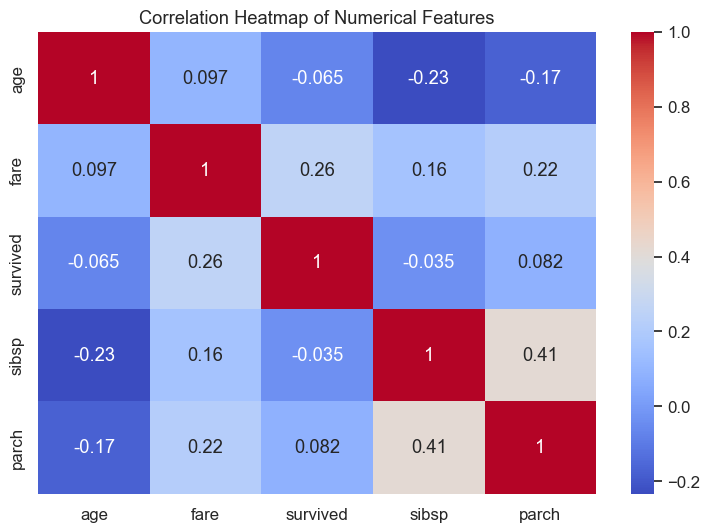

In [33]:
sns.set(font_scale = 1.1)
plt.figure(figsize = (9,6))
num_corr = df[['age', 'fare', 'survived', 'sibsp', 'parch']]
sns.heatmap(num_corr.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show() 

Insight: This heatmap reveals that fare has the most notable linear relationship with survival, showing a positive correlation (around 0.26) which indicates that wealthier passengers had a better chance of surviving. In contrast, age, parch, and sibsp all show very weak linear correlations.

# A Deeper Dive: Survival Rates by Age Groups and Gender

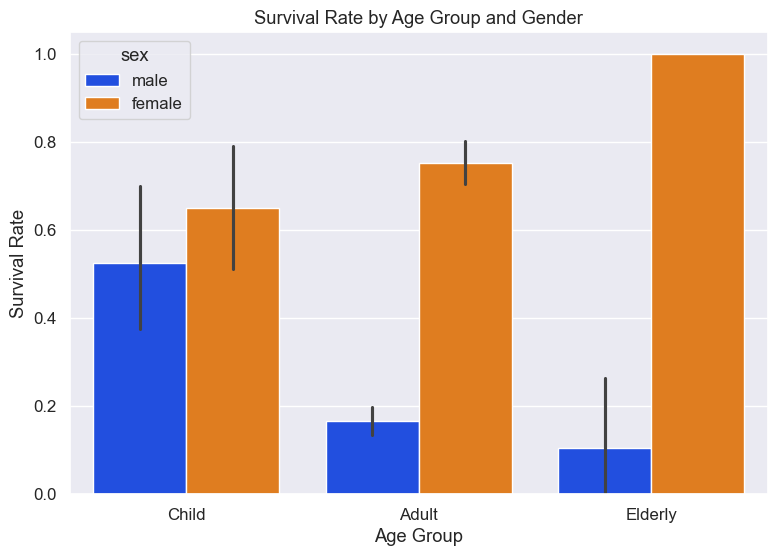

In [34]:
sns.set(font_scale = 1.1)
plt.figure(figsize = (9,6))

df['age_group'] = 'Adult'
df.loc[df['age'] < 16, 'age_group'] = 'Child'
df.loc[df['age'] > 60, 'age_group'] = 'Elderly'

sns.barplot(x='age_group', y='survived', data=df, hue='sex', order=['Child', 'Adult', 'Elderly'], palette = 'bright')
plt.title('Survival Rate by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

Insight: By binning passengers into 'Child', 'Adult', and 'Elderly', this chart provides a clearer picture. It confirms that female children had the highest probability of survival, followed closely by adult females. Male children had a significantly better chance than adult males but still worse than females of any age group.

# Conclusion & Summary of Findings

This exploratory data analysis of the Titanic dataset reveals that a passenger's chance of survival was not random but was strongly influenced by a combination of social and demographic factors.

 The key determinants of survival were:

1) Gender and Age: The "women and children first" protocol is clearly evident in the data. Female passengers and       young children had a significantly higher survival rate than adult males.

2) Socio-Economic Status: Passenger class was a primary predictor of survival. First-class passengers, who paid        higher fares, had a much greater chance of surviving than those in second or third class.

3) Family Size: Survival chances were highest for those in small family groups (2-4 members). Passengers traveling     alone or with very large families had a lower survival rate.

4) Port of Embarkation: While passengers from Cherbourg appeared to have a survival advantage, this was found to be    a confounding variable, as this port had a much higher concentration of first-class passengers.